In [1]:
import pandas as pd
import numpy as np

import string, re
from string import punctuation
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv("data/review_crawling.csv")
df.head()

,id_review,name,review,rate
0,0.0,Supardan bekasi,"Beli 3 buah, semua tidak ada yang keluar strum...",1
1,1.0,saipul saipul,Barang busuk dijual...ga berfungsi,1
2,2.0,Faizin Arif,"Saya turunin ratingnya, karena setelah saya co...",1
3,3.0,robby w,kondisi mati gak bs utk cas dsb,1
4,4.0,sofa rohmani,respon lama,1


In [3]:
df['label'] = df['rate'].map({1: 0, 2: 0, 3: 0, 4:1, 5:1})

In [73]:
df.dtypes

id_review    float64
name          object
review        object
rate           int64
label        float64
dtype: object

In [76]:
df.head()

,id_review,name,review,rate,label
0,0.0,Supardan bekasi,"Beli 3 buah, semua tidak ada yang keluar strum...",1,0
1,1.0,saipul saipul,Barang busuk dijual...ga berfungsi,1,0
2,2.0,Faizin Arif,"Saya turunin ratingnya, karena setelah saya co...",1,0
3,3.0,robby w,kondisi mati gak bs utk cas dsb,1,0
4,4.0,sofa rohmani,respon lama,1,0


In [4]:
def cleansing(data):
    # lower text
    data=data.lower()
    # hapus punctuation
    remove=string.punctuation
    translator = str.maketrans(remove, ' '*len(remove))
    data=data.translate(translator)
    # remove ASCII dan unicode
    data = data.encode('ascii', 'ignore').decode('utf-8')
    data = re.sub(r'[^\x00-\x7f]',r'', data)
    # remove newline
    data = data.replace('\n',' ')
    #remove number
    data = re.sub(r'\d+','',data)
    #remove whitespace
    data=" ".join(data.split())
    # Remove single space remaining at the front
    data = data.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    data = ''.join(c for c in data if c <= '\uFFFF') 
    # Remove words with 2 or fewer letters
    data = re.sub(r'\b\w{1,2}\b', '', data)
    # Remove tickers
    data = re.sub(r'\$\w*', '', data)
    return data

In [5]:
review=[]

for index, row in df.iterrows():
    review.append(cleansing(row['review']))

df['review']=review
df.head()

,id_review,name,review,rate,label
0,0.0,Supardan bekasi,beli buah semua tidak ada yang keluar strum al...,1,0
1,1.0,saipul saipul,barang busuk dijual berfungsi,1,0
2,2.0,Faizin Arif,saya turunin ratingnya karena setelah saya cob...,1,0
3,3.0,robby w,kondisi mati gak utk cas dsb,1,0
4,4.0,sofa rohmani,respon lama,1,0


In [6]:
# Membuat Steammer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [7]:
review=[]

for index, row in df.iterrows():
    review.append(stemmer.stem(row['review']))

df['review']=review
df.head()

,id_review,name,review,rate,label
0,0.0,Supardan bekasi,beli buah semua tidak ada yang keluar strum al...,1,0
1,1.0,saipul saipul,barang busuk jual fungsi,1,0
2,2.0,Faizin Arif,saya turunin ratingnya karena telah saya coba ...,1,0
3,3.0,robby w,kondisi mati gak utk cas dsb,1,0
4,4.0,sofa rohmani,respon lama,1,0


In [8]:
# Membuat Stopword Remover
factory = StopWordRemoverFactory()
stopwords = factory.create_stop_word_remover()

In [9]:
review=[]

for index, row in df.iterrows():
    review.append(stopwords.remove(row['review']))

df['review']=review
df.head()

,id_review,name,review,rate,label
0,0.0,Supardan bekasi,beli buah semua ada keluar strum alias mati semua,1,0
1,1.0,saipul saipul,barang busuk jual fungsi,1,0
2,2.0,Faizin Arif,turunin ratingnya telah coba buat ngecas trnya...,1,0
3,3.0,robby w,kondisi mati gak utk cas,1,0
4,4.0,sofa rohmani,respon lama,1,0


In [84]:
positif = df[df['label']==1]
negatif = df[df['label']==0]

In [13]:
def plot_cloud(wrdcld):
    plt.figure(figsize=(20,15))
    plt.imshow(wrdcld)
    plt.axis("off")

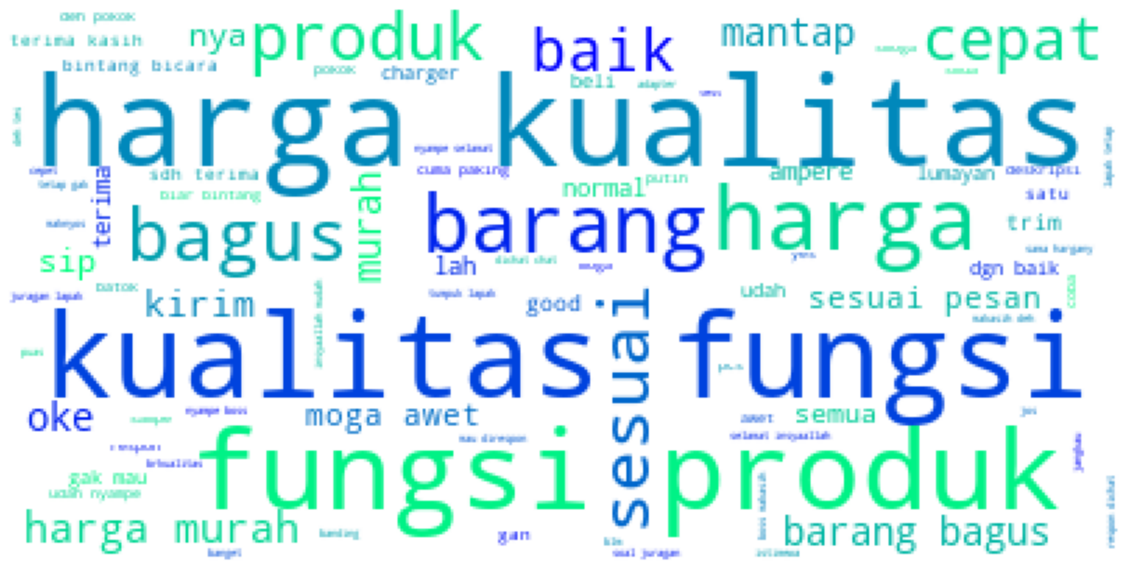

In [85]:
teks_positif = ' '.join(word for word in positif['review'])
wordcloud = WordCloud(random_state=100, background_color='white', colormap='winter').generate(teks_positif)
plot_cloud(wordcloud)

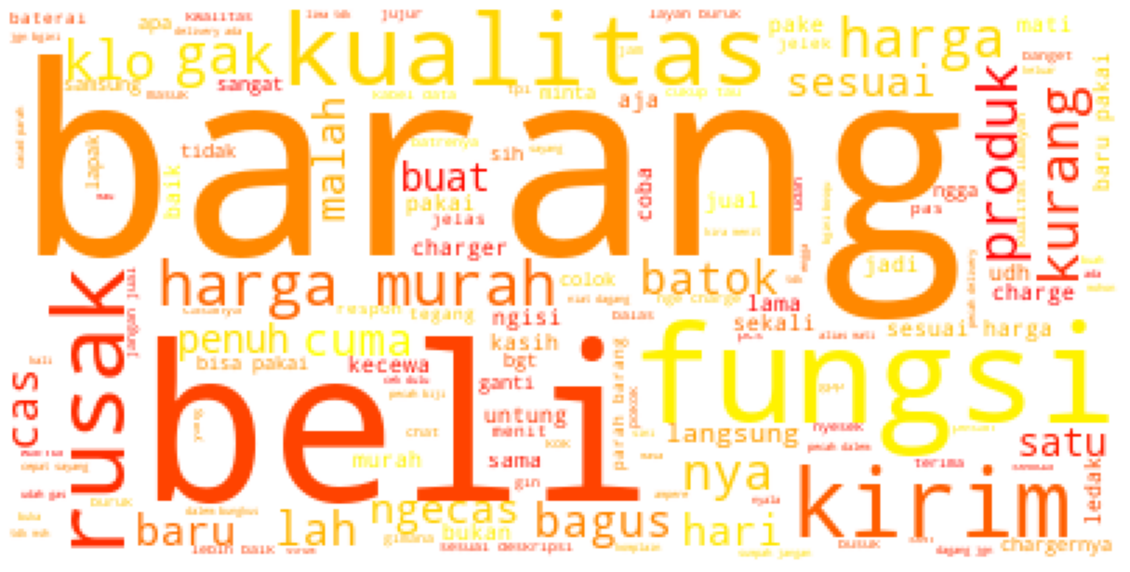

In [86]:
teks_negatif = ' '.join(word for word in negatif['review'])
wordcloud = WordCloud(random_state=100, background_color='white', colormap='autumn').generate(teks_negatif)
plot_cloud(wordcloud)

In [87]:
hasil_tokenisasi = word_tokenize(teks_positif)
frekuensi_kata = list(FreqDist([hasil.lower() for hasil in hasil_tokenisasi]).items())
frekuensi_kata = pd.DataFrame(frekuensi_kata, columns=['Kata', 'Frekuensi'])

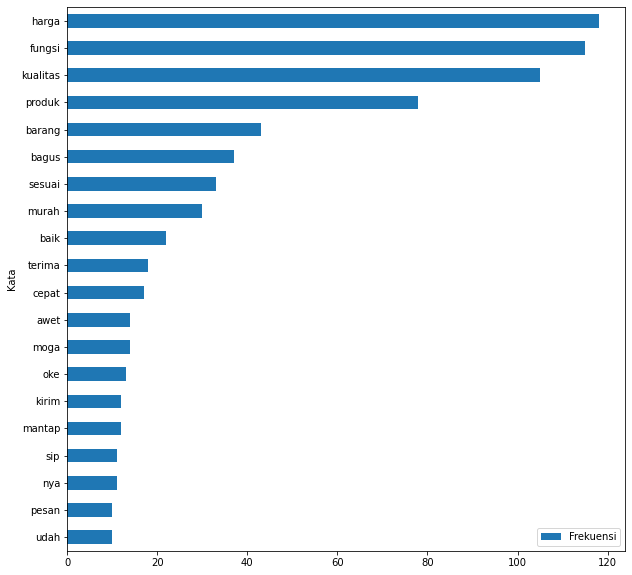

In [88]:
orderfreqP = frekuensi_kata.sort_values(by='Frekuensi', ascending=False)
orderfreqP.iloc[:20].sort_values(by='Frekuensi', ascending=True).plot.barh(x='Kata', y='Frekuensi', figsize=(10,10));

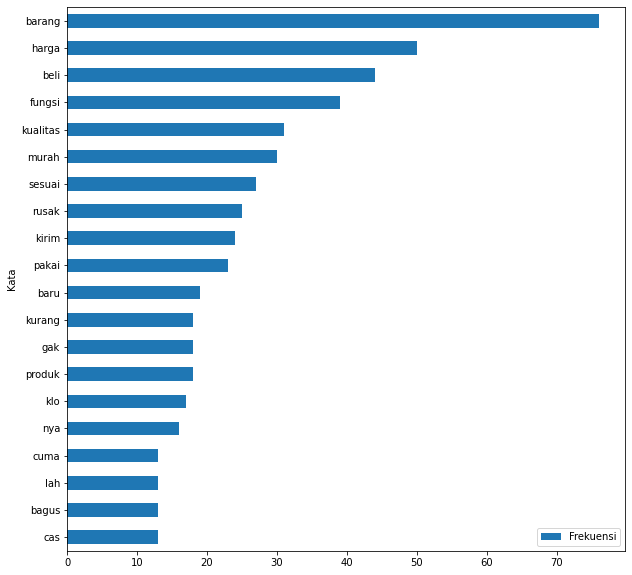

In [89]:
hasil_tokenisasi = word_tokenize(teks_negatif)
frekuensi_kata = list(FreqDist([hasil.lower() for hasil in hasil_tokenisasi]).items())
frekuensi_kata = pd.DataFrame(frekuensi_kata, columns=['Kata', 'Frekuensi'])
orderfreqN = frekuensi_kata.sort_values(by='Frekuensi', ascending=False)
orderfreqN.iloc[:20].sort_values(by='Frekuensi', ascending=True).plot.barh(x='Kata', y='Frekuensi', figsize=(10,10));

In [10]:
# ambil data kalimat, ubah jadi array
sentences = df['review'].values

# ambil label, ubah jadi array
y = df['label'].values

# train-test split
x_train, x_test, y_train, y_test = train_test_split(sentences, y, test_size=0.2, random_state=1000)

In [11]:
# inisiasi CountVectorizer
vectorizer = CountVectorizer()

# Membuat count vector embedding
vectorizer.fit(x_train)
vec_train = vectorizer.transform(x_train)
vec_test  = vectorizer.transform(x_test)

In [24]:
# inisiasi model Regresi Logistik
classifier = LogisticRegression()

# train model
classifier.fit(x_train, y_train)

# cek akurasi
score = classifier.score(x_test, y_test)
print("Accuracy:", score)

Accuracy: 0.9259259259259259


In [13]:
# inisiasi model Regresi Logistik
classifier = RandomForestClassifier()

# train model
classifier.fit(vec_train, y_train)

# cek akurasi
score = classifier.score(vec_test, y_test)
print("Accuracy:", score)


Accuracy: 0.9382716049382716


In [14]:
pipe = Pipeline(steps= [('vectorize', vectorizer),
                            ('model', classifier)])
pipe.fit(x_train, y_train)

Pipeline(steps=[('vectorize', CountVectorizer()),
                ('model', RandomForestClassifier())])

In [15]:
pipe.score(x_test,y_test)

0.9382716049382716

In [19]:
text = ["pantes murah, kualitas kurang bagus"]
pred = pipe.predict(text)
pred_prob = pipe.predict_proba(text)
if pred == 1:
    print('Review ini merupakan review Positif dengan probabilitas sebesar '+str(pred_prob[0,1]))
else:
    print('Review ini merupakan review Negatif dengan probabilitas sebesar '+str(pred_prob[0,0]))

Review ini merupakan review Negatif dengan probabilitas sebesar 0.59


In [17]:
joblib.dump(pipe, 'model.pkl')

['model.pkl']

In [64]:
joblib.dump(cleansing, 'cleaning.pkl')

['cleaning.pkl']